# Libraries

In [141]:
import re
import cv2
import pytesseract
from PIL import Image
import numpy as np
from pytesseract import Output
import matplotlib.pyplot as plt

# Functions

In [178]:
def preProcessing(image):
    
    # gray image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # bluring the image
    #blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # thresholding the image
    _, threshed = cv2.threshold(gray, 128, 255, cv2.THRESH_TRUNC)

    return threshed

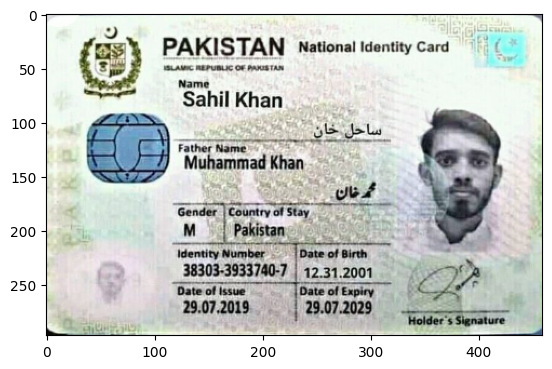

In [179]:
# Loading image 
img = cv2.imread("r1.png")
plt.imshow(img)

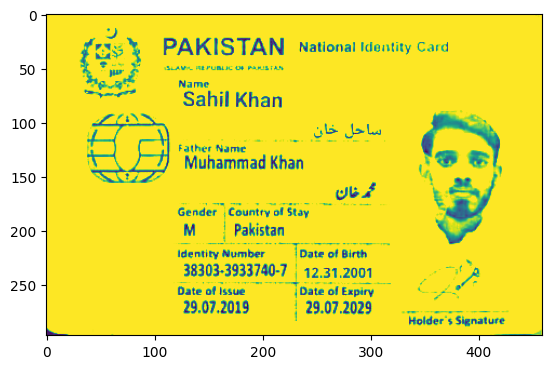

In [180]:
img = preProcessing(img)
plt.imshow(img)

In [181]:
text1 = pytesseract.image_to_data(img,output_type='data.frame')
#print(text1)
ocr_output = pytesseract.image_to_string(img, lang="eng")
print(ocr_output)


#text = text1[text1.conf != -1]
#lines = text.groupby('block_num')['text'].apply(list)
#conf = text.groupby(['block_num'])['conf'].mean()
#print(text)

foe yy
BoP tutrermta i
ate
"Sahil Khan
ob Jobs
Father Name
Muhammad Khan
wes
Gender Country of Stay
M Pakistan
Identity Number [Date of 8
38303-3933740-7 asa)
Date of issue Tate of Expiry
29.07.2019 | 29.07.2029

PAKISTAN National Identity Card

Holder's Signature



# Regular Expressions

In [185]:
# Extracting Name
name_pattern = re.compile(r'ate\n"(.*?)\n')
name_match = name_pattern.search(ocr_output)
name = name_match.group(1) if name_match else None
print(f"Name: {name}")

# Extracting Father Name
father_name_pattern = re.compile(r'Father Name\n(.*?)\n')
father_name_match = father_name_pattern.search(ocr_output)
father_name = father_name_match.group(1) if father_name_match else None
print(f"Father Name: {father_name}")

# Extracting Gender and Country of Stay
gender_country_pattern = re.compile(r'Gender\n(M|F)')
gender_country_match = gender_country_pattern.search(ocr_output)
gender = gender_country_match.group(1) if gender_country_match else None
country_of_stay = "Pakistan"  # Explicitly setting to "Pakistan"
print(f"Gender: {gender}")
print(f"Country of Stay: {country_of_stay}")

# Extracting Identity Number
identity_number_pattern = re.compile(r'Identity Number \[Date of (\d+)\n(.*?)\n')
identity_number_match = identity_number_pattern.search(ocr_output)
identity_number = identity_number_match.group(2) if identity_number_match else None
date_of_birth = identity_number_match.group(1) if identity_number_match else None
print(f"Identity Number: {identity_number}")
print(f"Date of Birth: {date_of_birth}")

# Extracting Date of Issue and Date of Expiry
dates_pattern = re.compile(r'Date of issue Tate of Expiry\n(.*?) \| (.*?)\n')
dates_match = dates_pattern.search(ocr_output)
date_of_issue = dates_match.group(1) if dates_match else None
date_of_expiry = dates_match.group(2) if dates_match else None
print(f"Date of Issue: {date_of_issue}")
print(f"Date of Expiry: {date_of_expiry}")

# storing in the file
output_filename = "Extracted_info.txt"
with open(output_filename, "w") as file:
    file.write(f"Name: {name}\n")
    file.write(f"Father Name: {father_name}\n")
    file.write(f"Gender: {gender}\n")
    file.write(f"Country of Stay: {country_of_stay}\n")
    file.write(f"Identity Number: {identity_number}\n")
    file.write(f"Date of Birth: {date_of_birth}\n")
    file.write(f"Date of Issue: {date_of_issue}\n")
    file.write(f"Date of Expiry: {date_of_expiry}\n")

Name: Sahil Khan
Father Name: Muhammad Khan
Gender: None
Country of Stay: Pakistan
Identity Number: 38303-3933740-7 asa)
Date of Birth: 8
Date of Issue: 29.07.2019
Date of Expiry: 29.07.2029


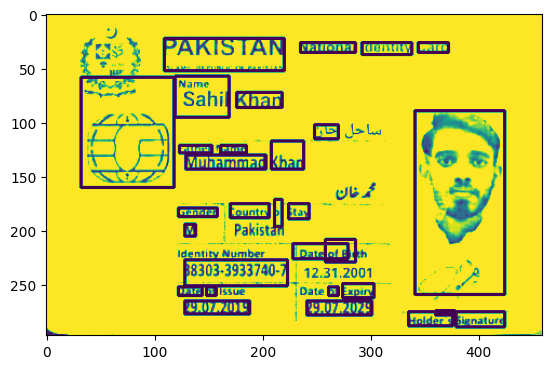

In [159]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)

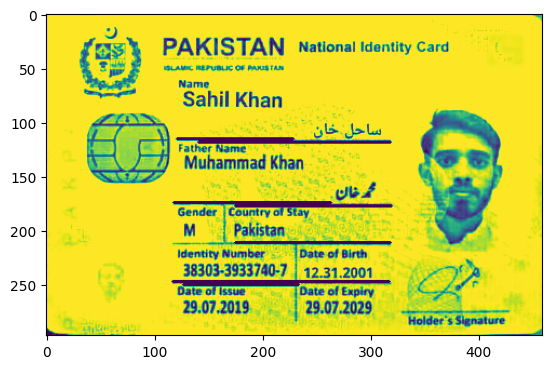

In [160]:
def detect_vertical_lines(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply a GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Use HoughLinesP to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=150, minLineLength=100, maxLineGap=5)

    # Draw the lines on the original image
    result_image = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(result_image)

detect_vertical_lines('r2.png')

# Face Extraction From CNIC

### Harr Featre Extraction 

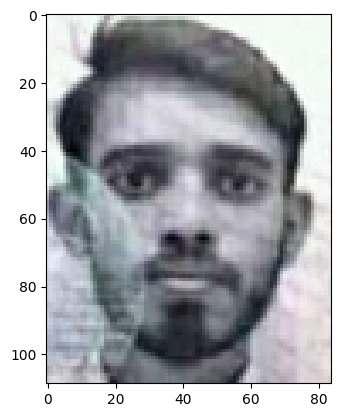

In [183]:
import matplotlib.pyplot as plt
import cv2

def detect_and_extract_person(image_path):
    # Load the pre-trained Haar cascade for face detection
    face_cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)

    # Read the input image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, (459,297))

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(30, 30))

    # Extract and save the bounded rectangle image
    for i, (x, y, w, h) in enumerate(faces):
        # Extract the region of interest (ROI)
        roi = image[y-15:y+h+10, x:x+w]

        # Save the ROI as a new image
        cv2.imwrite(f'person_harr_{i+1}.png', roi)
        plt.imshow(roi)

        # Draw rectangles around the detected faces on the original image
        cv2.rectangle(image, (x, y-17), (x+w, y+h+10), (0, 255, 0), 2)

    # Display the result with bounding boxes
    cv2.imshow('Person Detection', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
# Example usage
image_path = 'r1.png'
detect_and_extract_person(image_path)

### HOG

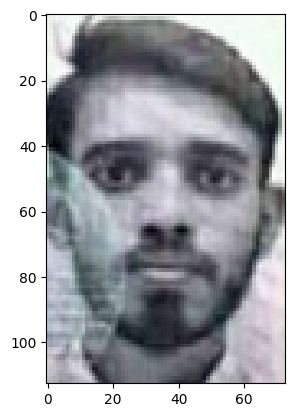

In [163]:
import matplotlib.pyplot as plt
import cv2
import dlib

def detect_and_extract_person_hog(image_path):
    # Load the pre-trained HOG face detector
    hog_face_detector = dlib.get_frontal_face_detector()

    # Read the input image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, (459, 297))

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection using HOG
    faces = hog_face_detector(gray)

    # Extract and save the bounded rectangle image
    for i, face in enumerate(faces):
        # Get the coordinates of the bounding box
        x, y, w, h = face.left(), face.top(), face.width(), face.height()

        # Extract the region of interest (ROI)
        roi = image[y-30:y+h+10, x:x+w]

        # Save the ROI as a new image
        cv2.imwrite(f'person_hog_{i+1}.png', roi)
        plt.imshow(roi)

        # Draw rectangles around the detected faces on the original image
        cv2.rectangle(image, (x, y-30), (x+w, y+h+10), (0, 255, 0), 2)

    # Display the result with bounding boxes
    cv2.imshow('Person Detection (HOG)', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'r1.png'
detect_and_extract_person_hog(image_path)

# Comparison with a Deep learning or Mechine Learning model

I have useed the MTCNN model for face detection, which can detect faces and provide bounding box coordinates.
The input image is read, and the MTCNN model is applied to detect faces.
Bounding box coordinates are used to extract ROIs, which are then saved as new images.
The original image is displayed with bounding boxes around detected faces.




1/1 [==============================] - 1s 594ms/step


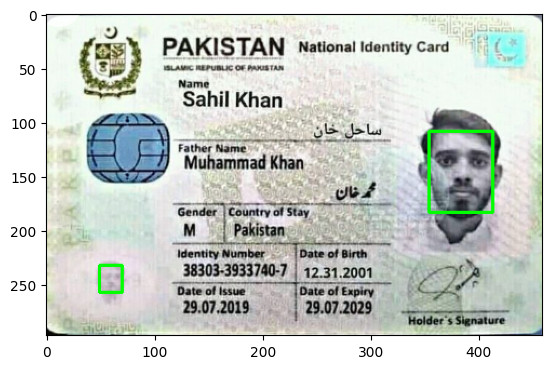

In [184]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

def detect_and_extract_person_cnn(image_path):
    # Load the MTCNN model
    detector = MTCNN()

    # Read the input image
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces = detector.detect_faces(rgb_image)

    # Extract and save the bounded rectangle image
    for i, face_info in enumerate(faces):
        x, y, w, h = face_info['box']
        
        # Extract the region of interest (ROI)
        roi = image[y:y+h, x:x+w]

        # Save the ROI as a new image
        cv2.imwrite(f'person_cnn_{i+1}.png', roi)
        plt.imshow(roi)

        # Draw rectangles around the detected faces on the original image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result with bounding boxes
    plt.imshow(image)
    plt.show()

# Example usage
image_path = 'r1.png'
detect_and_extract_person_cnn(image_path)

MTCNN model has correctly detected face on the CNIC. It is accurate near to 100% accuracy that it has also detect the face of the person on the side which was neglected by the conventional methods of face detection.

MTCNN (Multi-task Cascaded Convolutional Networks) is a deep learning-based face detection algorithm designed to detect faces and facial landmarks in images. It consists of three stages: Proposal Network (P-Net), Refine Network (R-Net), and Output Network (O-Net). Each stage is responsible for different tasks in the face detection pipeline.